**RELEVENT LIBRARIES IMPORTED**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

**MOUNT THE GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**CHANGING THE CURRENT WORKING DIRECTORY**

In [3]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Mini Project PS2019246/")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Mini Project PS2019246'

**LOAD AND DISPLAY A IMAGE FROM A SPECIFIED PATH**

Specify the path to the image and load the image using load_img from Keras


In [7]:
img = image.load_img("Training/e/1.jpg")

Display the image using matplotlib


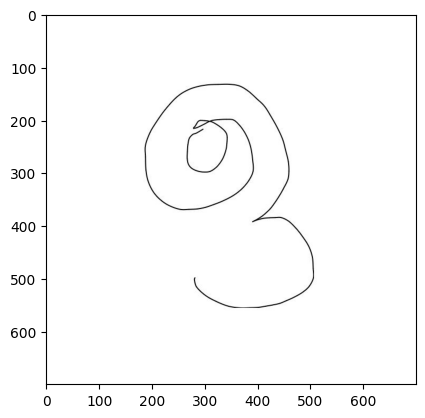

In [8]:
#Display the image using matplotlib
plt.imshow(img)

Read the image using OpenCV (cv2) and retrieve its shape

In [9]:
cv2.imread("Training/e/1.jpg").shape

(700, 700, 3)

In [10]:
# Create an ImageDataGenerator for training data with pixel value rescaling
train = ImageDataGenerator(rescale = 1/255)
# Create an ImageDataGenerator for validation data with pixel value rescaling
validation = ImageDataGenerator(rescale = 1/255)

**CREATE TRAINING AND VALIDATION DATASETS USING ImageDataGenerator**

In [11]:
# Create a training dataset generator using the training ImageDataGenerator
train_dataset = train.flow_from_directory('Training/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')
# Create a validation dataset generator using the validation ImageDataGenerator
validation_dataset = validation.flow_from_directory('Validation/',
                                                   target_size = (200,200),
                                                   batch_size = 3,
                                                   class_mode = 'binary')

Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [12]:
# Retrieve the mapping of class names to their indices in the training dataset
train_dataset.class_indices

{'e': 0, 'ta': 1}

In [13]:
# Retrieve the array of class indices for each sample in the training dataset
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**SPECIFYING THE CNN ARCHITECTURE**

In [14]:
# Create a Sequential model
# Convolutional layer with 16 filters, each of size (3, 3), and ReLU activation
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [15]:
# Compile the model with binary crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

**TRAINING THE MODEL**

In [16]:
# Train the model using the training dataset and validate on the validation dataset
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 36s 8s/step - loss: 8.1285 - accuracy: 0.4667 - val_loss: 0.9937 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 9s 2s/step - loss: 1.2297 - accuracy: 0.6429 - val_loss: 0.7205 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 5s 1s/step - loss: 0.8156 - accuracy: 0.5714 - val_loss: 0.6628 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.7565 - accuracy: 0.3333 - val_loss: 0.6311 - val_accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 5s 1s/step - loss: 0.6090 - accuracy: 0.8667 - val_loss: 0.5299 - val_accuracy: 0.8375
Epoch 6/30
5/5 [==============================] - 6s 1s/step - loss: 0.7734 - accuracy: 0.6000 - val_loss: 0.4431 - val_accuracy: 0.8375
Epoch 7/30
5/5 [==============================] - 6s 1s/step - loss: 0.5716 - accuracy: 0.6000 - val_loss: 0.2600 - val_accuracy: 1.0000
Epoch 8/30
5/5 [========================

Retrieve the mapping of class names to their indices in the validation dataset


In [17]:
validation_dataset.class_indices

{'e': 0, 'ta': 1}

**TESTING**

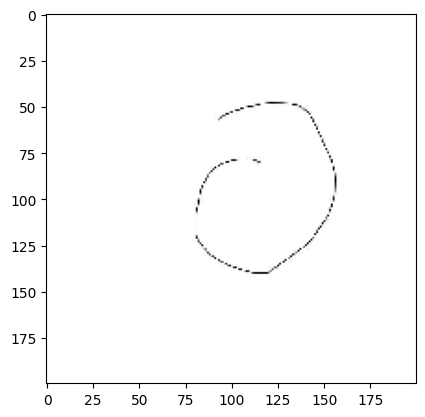

1/1 [==============================] - 0s 42ms/step
This is Letter 'Ta' in Sinhala


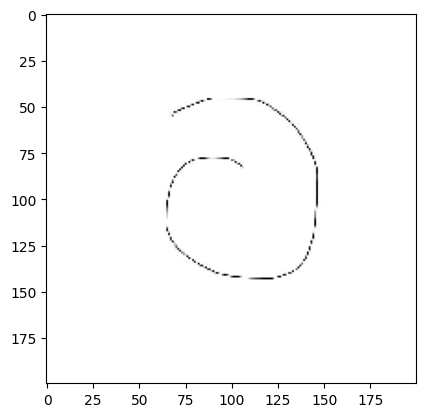

1/1 [==============================] - 0s 39ms/step
This is Letter 'Ta' in Sinhala


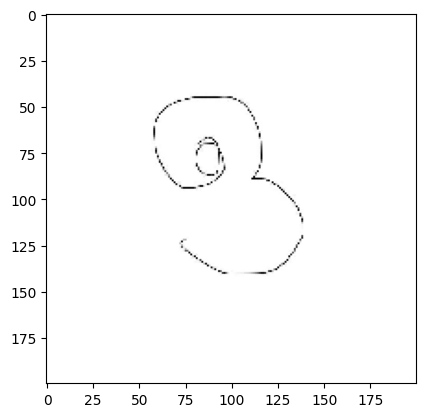

1/1 [==============================] - 0s 41ms/step
This is Letter 'E' in Sinhala


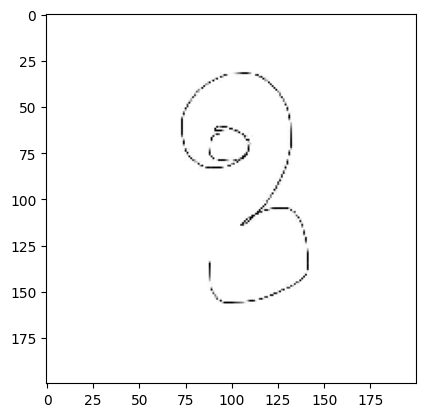

1/1 [==============================] - 0s 39ms/step
This is Letter 'E' in Sinhala


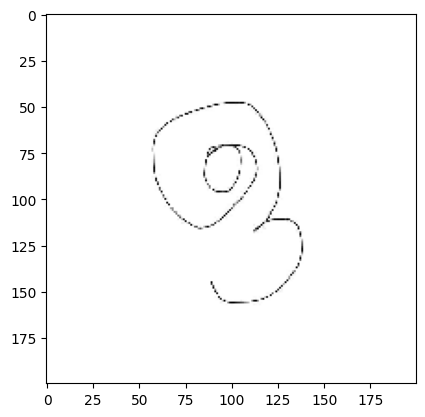

1/1 [==============================] - 0s 42ms/step
This is Letter 'E' in Sinhala


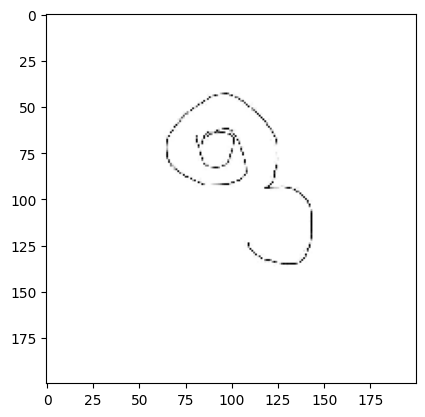

1/1 [==============================] - 0s 42ms/step
This is Letter 'E' in Sinhala


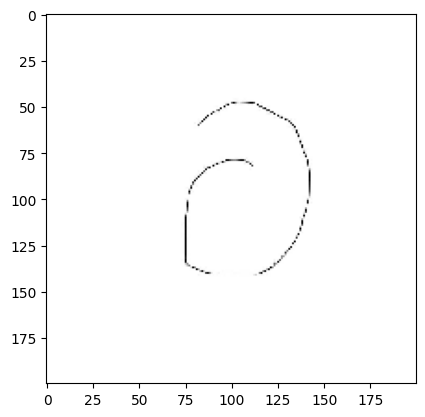

1/1 [==============================] - 0s 39ms/step
This is Letter 'Ta' in Sinhala


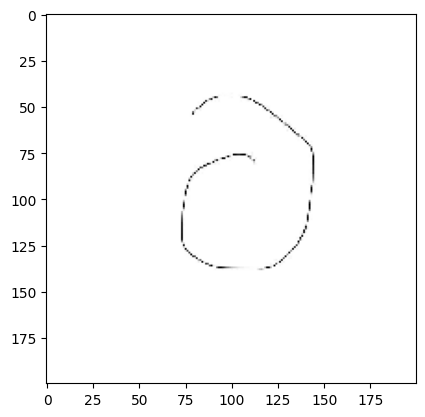

1/1 [==============================] - 0s 45ms/step
This is Letter 'Ta' in Sinhala


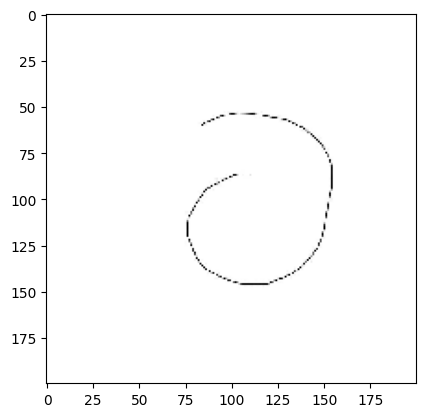

1/1 [==============================] - 0s 40ms/step
This is Letter 'Ta' in Sinhala


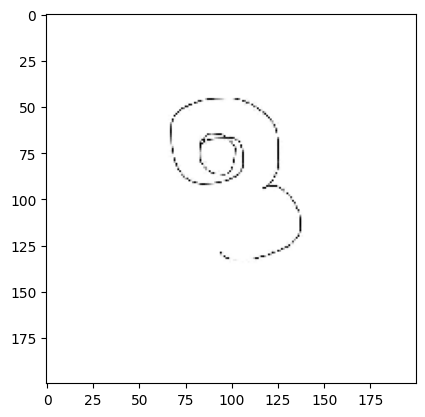

1/1 [==============================] - 0s 36ms/step
This is Letter 'E' in Sinhala


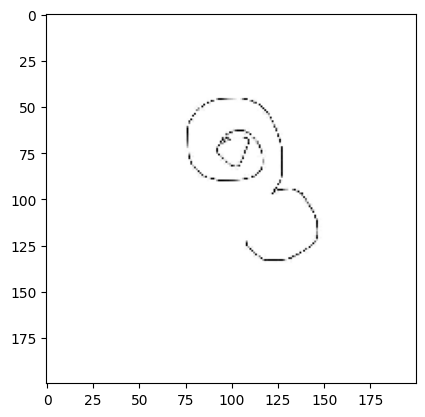

1/1 [==============================] - 0s 40ms/step
This is Letter 'E' in Sinhala


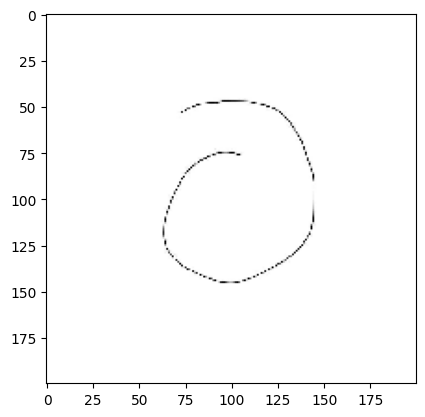

1/1 [==============================] - 0s 43ms/step
This is Letter 'Ta' in Sinhala


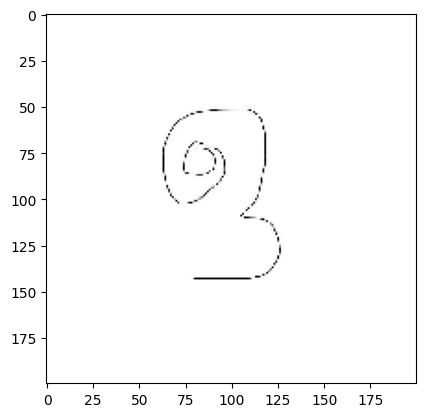

1/1 [==============================] - 0s 54ms/step
This is Letter 'E' in Sinhala


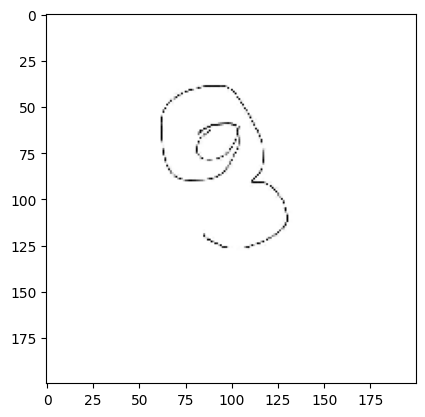

1/1 [==============================] - 0s 36ms/step
This is Letter 'E' in Sinhala


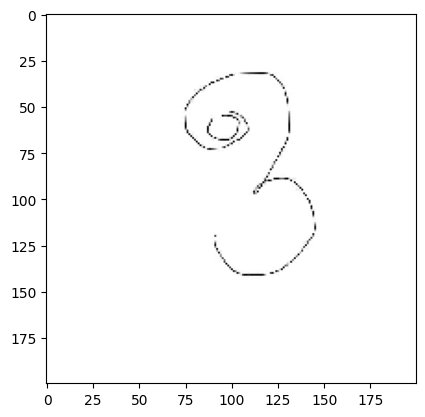

1/1 [==============================] - 0s 35ms/step
This is Letter 'E' in Sinhala


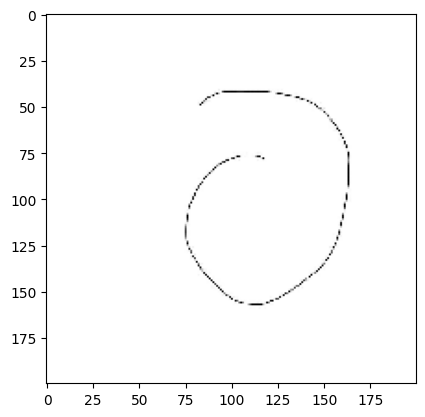

1/1 [==============================] - 0s 75ms/step
This is Letter 'Ta' in Sinhala


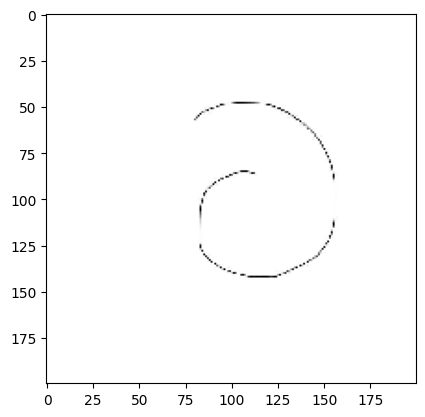

1/1 [==============================] - 0s 59ms/step
This is Letter 'Ta' in Sinhala


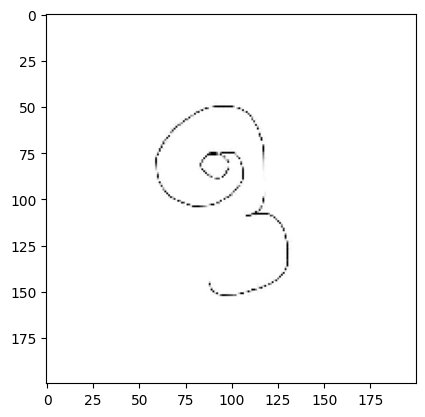

1/1 [==============================] - 0s 59ms/step
This is Letter 'E' in Sinhala


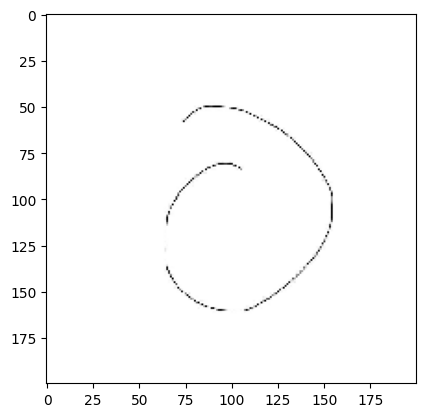

1/1 [==============================] - 0s 59ms/step
This is Letter 'Ta' in Sinhala


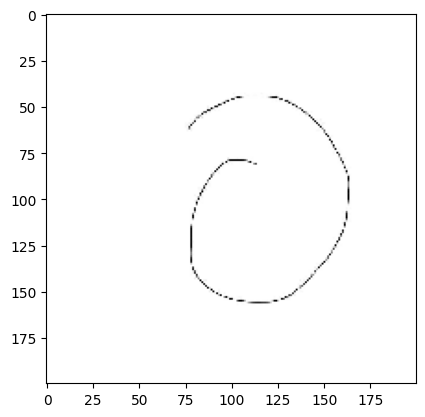

1/1 [==============================] - 0s 62ms/step
This is Letter 'Ta' in Sinhala


In [19]:
# Directory path containing the testing images
dir_path = 'Testing/'

# Loop over each file in the directory
for file_name in os.listdir(dir_path):
    # Concatenate the directory path and the file name
    file_path = os.path.join(dir_path, file_name)

    # Check if the item is a file (not a directory)
    if os.path.isfile(file_path):
        # Load the image and resize it to the target size
        img = image.load_img(file_path, target_size=(200, 200))
        # Display the image using matplotlib
        plt.imshow(img)
        plt.show()

        # Convert the image to a NumPy array and add an extra dimension
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        # Stack the array vertically to create a batch of images
        images = np.vstack([X])
        # Make a prediction using the trained model
        val = model.predict(images)
        # Check the predicted value and print the corresponding class label
        if val == 0:
            print("This is Letter 'E' in Sinhala")
        else:
            print("This is Letter 'Ta' in Sinhala")